In [1]:
'''
Created on March 4, 2018

@author: coknoe

Implement function for ANMADA
'''
import math
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
#from blaze.expr.expressions import label
from sympy.functions import re
from sympy import I
from scipy.stats import norm
# from matplotlib import interactive
# interactive(True)
#%matplotlib inline

#Global variable 
step = np.arange(-0.5, 1.5, 0.1) #evenly spaced values within an interval, ndarray


def example(x):
    return 2*x**3 - x + 0.5

def plotexample():
    '''returns a list of y values for a function over [a,b]'''
    res = np.zeros_like(step) #create ndarray with zeros
    for counter, value in enumerate(step):
        y = example(value)
        res[counter] = y
    return res

def plotExample():
    '''returns a list of y values for a function integrated over [a,b]'''
    res = np.zeros_like(step) #create ndarray with zeros
    for counter, value in enumerate(step):
        y, err = integrate.quad(example, 0.5, value)
        res[counter] = y
    return res

def cosfft(x, a, b):
    res = 0
    for k in range(499):
        expr = re( norm.pdf(k * np.pi /(b-a)) * math.exp(-I * (k * a * np.pi)/(b - a)) )
        res = res + 2/(b-a) * expr * np.cos(k * np.pi * (x - a)/(b - a))
    return res  
 
def plotcosfft(a, b):
    '''returns a tuple containing a list of x values and a list of y values for a function over [a,b]'''
    step = np.arange(a, b, 0.1)
    res = np.zeros_like(step)
    for counter, value in enumerate(step):
        y = cosfft(value, a, b)
        res[counter] = y
    return (step, res)
        

    
    
    
    
    
    

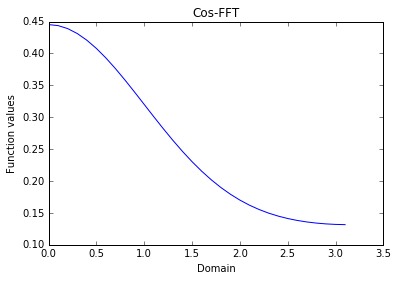

In [2]:
plt.figure(2)
(x, y) = plotcosfft(0, np.pi) #produce x and y values of Cos-FFT Function
plt.plot(x, y, label = "Cos-FFT Function", color = "b")
plt.title("Cos-FFT")
plt.xlabel('Domain')
plt.ylabel('Function values')
plt.show()